# Titanic Survival Prediction
This notebook explores the famous Titanic dataset from Kaggle.

## Goals
- Understand the dataset and its structure.
- Perform data cleaning and preprocessing.
- Conduct Exploratory Data Analysis (EDA) with visualizations.
- Build a basic Machine Learning model to predict survival.

## Dataset Description
The dataset includes various features about passengers such as age, sex, ticket class, and whether they survived.

**Columns Explanation:**
- `Survived`: Target variable (1 = Survived, 0 = Died)
- `Pclass`: Passenger class (1st, 2nd, 3rd)
- `Sex`: Gender of passenger
- `Age`: Age in years
- `SibSp`: Number of siblings/spouses aboard
- `Parch`: Number of parents/children aboard
- `Ticket`: Ticket number
- `Fare`: Ticket price
- `Cabin`: Cabin number (if available)
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)
Let's visualize survival rates based on key features.

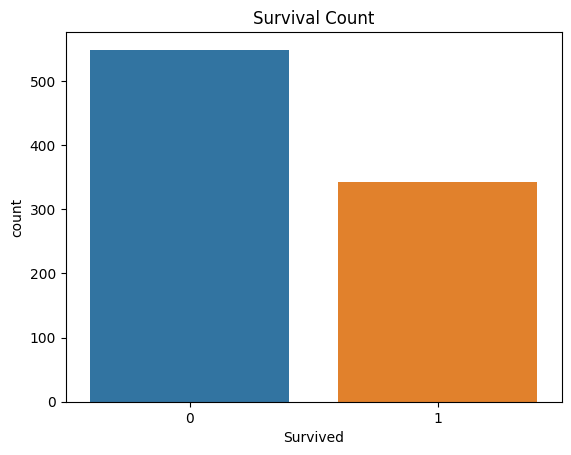

In [2]:
# Survival count
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

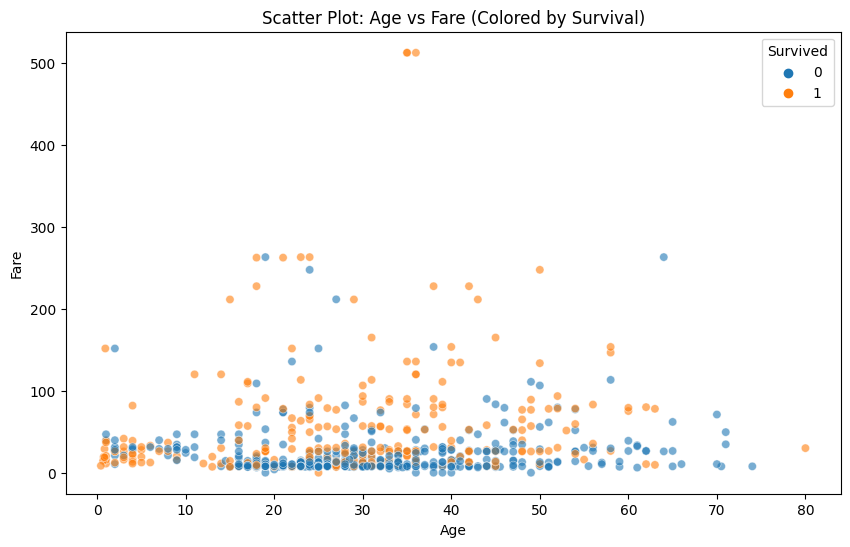

In [3]:
# Scatter plot of Age vs Fare, colored by Survival
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, alpha=0.6)
plt.title('Scatter Plot: Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


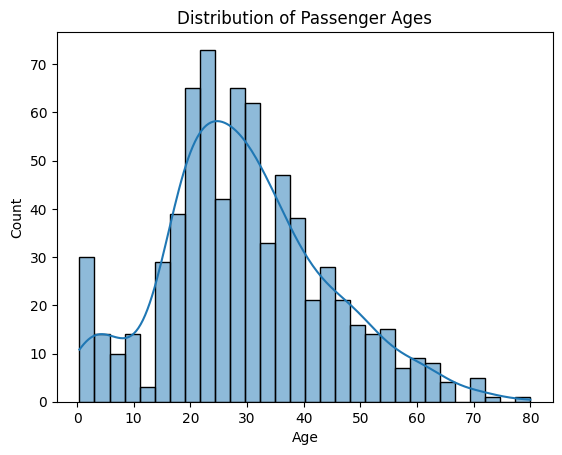

In [4]:
# Fixing Seaborn FutureWarning
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

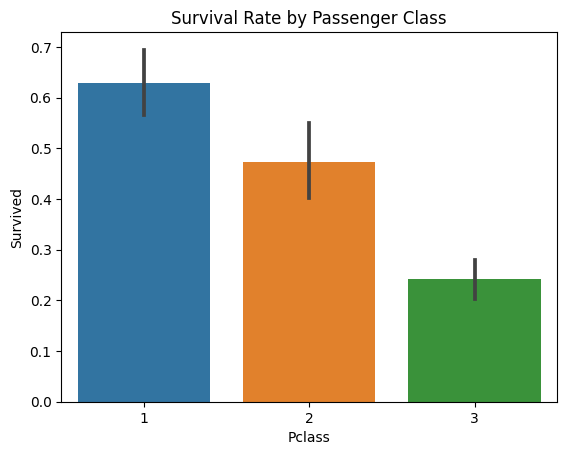

In [5]:
# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

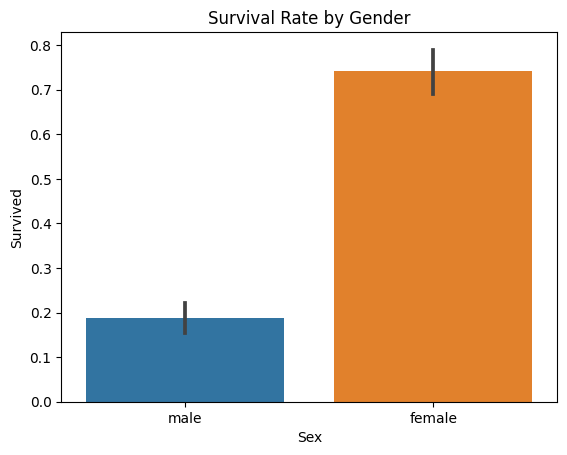

In [6]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

## Feature Engineering & Model Building
We'll build a basic model using Logistic Regression.

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Handling missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])
train_data['Embarked'] = LabelEncoder().fit_transform(train_data['Embarked'])

# Selecting features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')


Logistic Regression Model Accuracy: 0.81


<ipython-input-7-c6ecdcb198bb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-7-c6ecdcb198bb>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## Conclusion
- We cleaned and explored the Titanic dataset.
- We visualized survival rates based on different features.
- We built a basic Logistic Regression model, achieving reasonable accuracy.

Further improvements can be made using advanced models like Random Forest or Neural Networks!